In [6]:
#############
###paths#####
#############
import sys
import os

from importlib_metadata import distribution

pwd = os.getcwd()
modellingpath = pwd.rpartition("modelling")[0] + pwd.rpartition("modelling")[1] 
sys.path.append(modellingpath + '/lib')

#############
###Imports#####
#############
from numerical.adi_ca_function_openclosed_nodilution import adi_ca_openclosed_nodilution
from numerical.plotting_numerical import *
from numerical.adi_square_function import adi as adi
from numerical.adi_square_function_testRoozbeh import adi as adi_pseudonumba
from numerical.adi_square_function_numba import adi as adi_numba

import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
#############
###execution parameters#####
#############
mechanism = 'fullcircuit'
shape = 'ca'
# parID = int(sys.argv[1])
parID = 1

circuit_n=2
variant=9

# folder = 'fullcircuit/1M_turingI'#'fullcircuit/1M'#'fullcircuit/1M_turingI'
n_species = 2

parametersets_n = 10 #1000000
save_figure = False
tqdm_disable = False #disable tqdm
# boundarycoeff = float(sys.argv[6])
boundarycoeff = 2
seed=1;p_division=1#0.147#0.5

# open parameter dictionaries
lsa_df= pickle.load( open(modellingpath + '/3954/paper/input/parameterfiles/df_circuit%s_variant%s_%rparametersets.pkl'%(circuit_n,variant,parametersets_n), "rb" ) )
par_dict = lsa_df.loc[parID].to_dict()
# par_dict = general_df.iloc[parID].to_dict()

d_A = par_dict['d_A']
d_B = par_dict['d_B']

D = np.zeros(n_species)
D[0]=d_A
D[1]=d_B
print(par_dict)
# par_dict['mulva'] = par_dict['mulva'] + np.log(2)*p_division


#solver parameters
# L_x=int(sys.argv[2]); x_gridpoints = int(sys.argv[3]); L=L_x; J = L*x_gridpoints;  L_y=L_x; I=J
# T =int(sys.argv[4]); t_gridpoints = int(sys.argv[5]) ; N = T*t_gridpoints

# L_x=1; x_gridpoints = 25; L=L_x; J = L*x_gridpoints;  L_y=L_x; I=J
# T =120; t_gridpoints = 10 ; N = T*t_gridpoints

L_x=1; x_gridpoints = 30; L=L_x; J = L*x_gridpoints;  L_y=L_x; I=J
T =50; t_gridpoints =  int(1/0.09) ; N = T*t_gridpoints

suggested_tgridpoints = x_gridpoints**2

filename = 'circuit%r_variant%s_bc%s_%s_%sID%r_L%r_J%r_T%r_N%r'%(circuit_n,variant,boundarycoeff, shape,mechanism,parID,L,J,T,N)


{'ba': 0.01, 'bb': 0.01, 'bc': 0.01, 'bd': 0.01, 'be': 0.01, 'bf': 0.01, 'Va': 234.82043088667623, 'Vb': 458.6080757193134, 'Vc': 19.382421247197062, 'Vd': 22.946892435470495, 'Ve': 14.678734474845223, 'Vf': 354.93950361737353, 'kaa': 0.5175944708601402, 'kda': 0.44998838287145204, 'keb': 0.8778759694723844, 'kbd': 227.47446428966882, 'kce': 8.31637256648883, 'kfe': 0.14649491479470175, 'kee': 1.5736766774886048, 'mua': 0.04928906718711462, 'mulva': 0.09316032520780967, 'd_A': 2.0, 'd_B': 0.8, 'n': 2.0}


In [2]:
U_record,U_final = adi_numba(par_dict,L_x,L_y,J,I,T,N, circuit_n, n_species,D,tqdm_disable=False,stochasticity=0, steadystates=0)#,p_division=p_division,seed=seed)

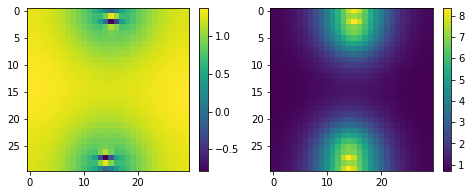

In [3]:
index = -1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(U_final[-1])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(U_final[0])
plt.colorbar(shrink=.75)
plt.show()

In [7]:
U_record,U_final = adi_pseudonumba(par_dict,L_x,L_y,J,I,T,N, circuit_n, n_species,D,tqdm_disable=True,stochasticity=0, steadystates=0)#,p_division=p_division,seed=seed)


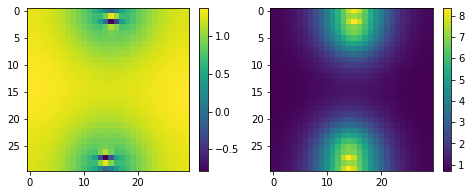

In [8]:
index = -1
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(U_final[-1])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(U_final[0])
plt.colorbar(shrink=.75)
plt.show()